In [1670]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1671]:
%autoreload 2

In [1672]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
from collections import Counter
import pandas as pd
import numpy as np

'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation, Neptune_data_read
from parameter import *
from dspike_formulas import *

import pylab as plt

In [1585]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2017-09-13_DS_calib/"
files_start = 8247
files_end = 8302

In [1595]:
# cup configuration
#cup_config = cycle_Sb
Sn_isotopes = ["117", "118", "119", "120", "122", "124"]
cup_config = cycles_spike

# Mass Range of cup configuration
mass_range = cycle_Sn_spike_mass_range

# Isotopes used for Interference correction
#corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
corr_isotopes_2 = {"Te" : "125", "Xe" : "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}

norm_ratio_int = ["122","118"]
norm_ratio_Sb = ["123", "121"]
denom_isotope_int = norm_ratio_int[1]

Sn_monitor = ["125", "129"]


def eval_iso_list(isotopes_list,norm_ratio, monitor_iso):
    isotope_nom = norm_ratio[0]
    isotope_den = norm_ratio[1]
    isotopes_list.remove(norm_ratio[1])
    for i in range(len(monitor_iso)):
        isotopes_list.append(monitor_iso[i])
    isotopes_list.sort()
    return isotopes_list

isotope_ls = eval_iso_list(Sn_isotopes, norm_ratio_int, Sn_monitor)

data_sample_column = [(i + "/" + denom_isotope_int) for i in isotope_ls]
isotopes = [isotope_ls]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True

In [1587]:
isotopes

[['118', '119', '120', '122', '124', '125', '129']]

In [1673]:
True_123Sb_121Sb = 0.7479
mod_123Sb_121Sb = 0.747491
mod_122_117Sn = 0.806799155732

In [1674]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(8195,8218,1) + range(8220,8245, 1) 

for sample in files_1:
    
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)

#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(5234)

In [1675]:
df_all[df_all.index == "2017-09-15 15:43:00"]

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1),L4 (1)
date,,,,,,,,,,,,,,,
2017-09-15 15:43:00,1,DS 1ppm 1,0.000532,0.000679,0.000624,-0.000028,-1.368960e-05,0.324525,4.607100,22.235329,6.011241,0.910504,0.240884,0.269969,25.856964
2017-09-15 15:43:00,2,DS 1ppm 1,0.000563,0.000686,0.000611,-0.000008,3.390000e-07,0.324018,4.598165,22.199591,5.999442,0.909022,0.240488,0.269496,25.812455
2017-09-15 15:43:00,3,DS 1ppm 1,0.000540,0.000675,0.000608,-0.000016,-1.481700e-06,0.324759,4.610416,22.250789,6.015586,0.911196,0.240990,0.270191,25.873178
2017-09-15 15:43:00,4,DS 1ppm 1,0.000542,0.000665,0.000581,-0.000011,1.058390e-05,0.319608,4.552955,21.896861,5.941535,0.896755,0.237284,0.265917,25.472085
2017-09-15 15:43:00,5,DS 1ppm 1,0.000557,0.000688,0.000633,-0.000013,1.359690e-05,0.324031,4.599816,22.201807,6.001331,0.909029,0.240459,0.269537,25.814710
2017-09-15 15:43:00,6,DS 1ppm 1,0.000566,0.000685,0.000604,-0.000008,-3.837400e-06,0.325241,4.617612,22.284112,6.025061,0.912456,0.241390,0.270618,25.914336
2017-09-15 15:43:00,7,DS 1ppm 1,0.000568,0.000699,0.000620,0.000011,-5.574000e-06,0.325230,4.618398,22.285116,6.025899,0.912494,0.241413,0.270648,25.914089
2017-09-15 15:43:00,8,DS 1ppm 1,0.000557,0.000676,0.000613,-0.000002,1.692130e-05,0.325645,4.621058,22.309981,6.029258,0.913621,0.241683,0.270877,25.942022
2017-09-15 15:43:00,9,DS 1ppm 1,0.000544,0.000688,0.000623,-0.000016,1.871690e-05,0.325173,4.614440,22.276849,6.020508,0.912177,0.241313,0.270462,25.901525


In [1676]:
database["Te"]["Masses"].get_all_Isotope_masses()

{'120': 119.904021,
 '122': 121.903055,
 '124': 123.902825,
 '125': 124.904435,
 '126': 125.90331,
 '128': 127.904461519,
 '130': 129.906222921}

In [1677]:
df_all.groupby(df_all.index).agg([np.mean])

,cycle,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1),L4 (1)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
date,,,,,,,,,,,,,,
2017-09-15 11:46:00,10.5,0.000532,0.000638,0.000111,1.682115e-05,8.451150e-07,0.000050,0.000057,0.000043,0.000067,0.000233,0.000038,0.000160,0.000091
2017-09-15 11:51:00,10.5,0.000502,0.000642,0.000222,-1.109528e-05,1.442156e-05,3.140935,4.277192,2.451252,5.579764,16.818592,4.373827,12.175394,3.805474
2017-09-15 12:02:00,10.5,0.000510,0.000645,0.000155,2.035012e-05,3.534875e-06,0.000050,0.000066,0.000052,0.000074,0.000269,0.000068,0.000180,0.000070
2017-09-15 12:07:00,10.5,0.000463,0.000588,0.000300,-1.723832e-05,9.454600e-06,3.129668,4.257821,2.442196,5.554066,16.755749,4.357436,12.129203,3.790951
2017-09-15 12:17:00,10.5,0.000956,0.001154,0.000205,2.215350e-06,7.527230e-06,0.000056,0.000050,0.000045,0.000082,0.000285,0.000079,0.000218,0.000075
2017-09-15 12:22:00,10.5,0.000870,0.001072,0.000348,-1.369350e-06,1.712093e-05,3.177656,4.326655,2.479962,5.644283,17.015926,4.425263,12.318659,3.850365
2017-09-15 12:33:00,10.5,0.000787,0.000953,0.000229,-8.351800e-07,-1.861266e-05,0.000061,0.000053,0.000046,0.000076,0.000327,0.000086,0.000228,0.000070
2017-09-15 12:38:00,10.5,0.000532,0.000660,0.000417,-2.564449e-05,1.864216e-05,3.153234,4.293163,2.460905,5.600448,16.884666,4.391157,12.223414,3.820557


In [1678]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()
df_Sb_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    
     # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
        #new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        #new_corr.line2_corr(df_zero, "119")
    
    
    data_int = new_corr.internal_norm_1(norm_ratio_int, denom_isotope_int, iter_beta)
    beta_int = new_corr.beta("Sn", norm_ratio_int, iter_beta)
    data_int = pd.DataFrame.from_dict(data_int, orient = 'index')
    beta_int = pd.Series(beta_int, name="beta_int")
    data_int = new_corr.mad_outlier_rejection(data_int)
    
    data_Sb = new_corr.external_norm_Sb(norm_ratio_Sb, denom_isotope_int, iter_beta)
    beta_Sb = new_corr.beta("Sb", norm_ratio_Sb, iter_beta)
    data_Sb = pd.DataFrame.from_dict(data_Sb, orient = 'index')
    beta_Sb= pd.Series(beta_Sb, name="beta_Sb")
    data_Sb = new_corr.mad_outlier_rejection(data_Sb)
   
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    
    #data_int = data_int.drop(denom_isotope_int, axis=1)
    data_int = data_int[sorted(data_int.columns)]
    data_int.columns = data_sample_column
    data_int["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_int["sample"] = sample_name
    data_int["cycle"] = data_int.index.values
    data_int = pd.concat((data_int, beta_int), axis=1, join='inner')
    
    #data_Sb = data_Sb.drop(denom_isotope_int, axis=1)
    data_Sb = data_Sb[sorted(data_Sb.columns)]
    data_Sb.columns = data_sample_column
    data_Sb["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_Sb["sample"] = sample_name
    data_Sb["cycle"] = data_Sb.index.values
    data_Sb= pd.concat((data_Sb, beta_Sb), axis=1, join='inner')

    df_internal_norm = df_internal_norm.append(data_int)
    df_Sb_norm = df_Sb_norm.append(data_Sb)
df_internal_norm.set_index("date", inplace = True)
df_Sb_norm.set_index("date", inplace = True)

nu_data_reduction.py:837: RuntimeWarning: divide by zero encountered in divide
  cycles = range(1, len(df.data_read(sample).index)+1)
nu_data_reduction.py:837: RuntimeWarning: invalid value encountered in divide
  cycles = range(1, len(df.data_read(sample).index)+1)
nu_data_reduction.py:839: RuntimeWarning: invalid value encountered in greater
  if bgd_corr == True:


In [1679]:
sample = "NIST 1ppm"
ratio = "120/118"

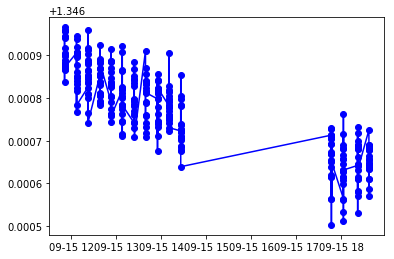

In [1680]:
plt.plot(df_Sb_norm[df_Sb_norm["sample"] == sample].index, df_Sb_norm[df_Sb_norm["sample"] == sample][ratio], linestyle='-', marker='o', color='b')
plt.show()

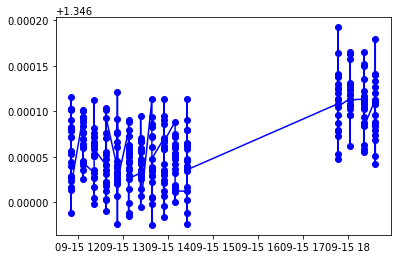

In [1681]:
plt.plot(df_internal_norm[df_internal_norm["sample"] == sample].index, df_internal_norm[df_internal_norm["sample"] == sample][ratio], linestyle='-', marker='o', color='b')
plt.show()

In [1682]:
df_Sb_norm["124/118"].mean() - df_internal_norm["124/118"].mean()

0.49757469629533846

In [1683]:
df_Sb_norm_new = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    
     # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
        #new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        #new_corr.line2_corr(df_zero, "119")
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
        
    data_Sb_new = new_corr.external_norm_Sb_change_true(norm_ratio_Sb, denom_isotope_int, iter_beta, mod_123Sb_121Sb)
    data_Sb_new = pd.DataFrame.from_dict(data_Sb_new, orient = 'index')
    data_Sb_new = new_corr.mad_outlier_rejection(data_Sb_new)
        
    data_Sb_new = data_Sb_new[sorted(data_Sb_new.columns)]
    data_Sb_new.columns = data_sample_column
    data_Sb_new["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_Sb_new["sample"] = sample_name
    data_Sb_new["cycle"] = data_Sb_new.index.values
        
    df_Sb_norm_new = df_Sb_norm_new.append(data_Sb_new)
    
df_Sb_norm_new.set_index("date", inplace = True)

In [1684]:
df_Sb_norm_new_117 = pd.DataFrame()
data_sample_column_117 = ['118/117', '119/117', '120/117', '122/117', '124/117', '125/117', '129/117']
isotopes_117 = [['118', '119', '120', '122', '124', '125', '129']]

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    
     # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes_117, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
        #new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes_117, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        #new_corr.line2_corr(df_zero, "119")
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
        
    data_Sb_new_117 = new_corr.external_norm_Sb_change_true(norm_ratio_Sb, "117", iter_beta, mod_123Sb_121Sb)
    data_Sb_new_117 = pd.DataFrame.from_dict(data_Sb_new_117, orient = 'index')
    data_Sb_new_117 = new_corr.mad_outlier_rejection(data_Sb_new_117)
        
    data_Sb_new_117 = data_Sb_new_117[sorted(data_Sb_new_117.columns)]
    data_Sb_new_117.columns = data_sample_column_117
    data_Sb_new_117["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_Sb_new_117["sample"] = sample_name
    data_Sb_new_117["cycle"] = data_Sb_new_117.index.values
        
    df_Sb_norm_new_117 = df_Sb_norm_new_117.append(data_Sb_new_117)
    
df_Sb_norm_new_117.set_index("date", inplace = True)


In [1685]:
df_int_norm_new_117 = pd.DataFrame()
data_sample_column_117 = ['118/117', '119/117', '120/117', '122/117', '124/117', '125/117', '129/117']
isotopes_117 = [['118', '119', '120', '122', '124', '125', '129']]

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    
     # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes_117, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
        #new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes_117, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        #new_corr.line2_corr(df_zero, "119")
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
        
    data_int_new_117 = new_corr.internal_norm_Sb_change_true(norm_ratio_int, "117", iter_beta, mod_122_117Sn)
    data_int_new_117 = pd.DataFrame.from_dict(data_int_new_117, orient = 'index')
    #data_int_new_117 = new_corr.mad_outlier_rejection(data_int_new_117)
        
    data_int_new_117 = data_int_new_117[sorted(data_int_new_117.columns)]
    data_int_new_117.columns = data_sample_column_117
    data_int_new_117["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_int_new_117["sample"] = sample_name
    data_int_new_117["cycle"] = data_int_new_117.index.values
        
    df_int_norm_new_117 = df_int_norm_new_117.append(data_int_new_117)
    
df_int_norm_new_117.set_index("date", inplace = True)

In [1686]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_Sb_norm_sub_mean = df_Sb_norm.drop("cycle", axis=1).groupby(df_Sb_norm.index).agg([np.mean])
df_Sb_norm_sub_mean["sample"] = df_Sb_norm[~df_Sb_norm.index.duplicated(keep='first')]["sample"]
df_Sb_norm_new_sub_mean = df_Sb_norm_new.drop("cycle", axis=1).groupby(df_Sb_norm_new.index).agg([np.mean])
df_Sb_norm_new_sub_mean["sample"] = df_Sb_norm_new[~df_Sb_norm_new.index.duplicated(keep='first')]["sample"]
df_Sb_norm_new_117_sub_mean = df_Sb_norm_new_117.drop("cycle", axis=1).groupby(df_Sb_norm_new_117.index).agg([np.mean])
df_Sb_norm_new_117_sub_mean["sample"] = df_Sb_norm_new_117[~df_Sb_norm_new_117.index.duplicated(keep='first')]["sample"]
df_internal_norm_sub_mean = df_internal_norm.drop("cycle", axis=1).groupby(df_internal_norm.index).agg([np.mean])
df_internal_norm_sub_mean["sample"] = df_internal_norm[~df_internal_norm.index.duplicated(keep='first')]["sample"]
df_int_norm_new_117_sub_mean = df_int_norm_new_117.drop("cycle", axis=1).groupby(df_int_norm_new_117.index).agg([np.mean])
df_int_norm_new_117_sub_mean["sample"] = df_int_norm_new_117[~df_int_norm_new_117.index.duplicated(keep='first')]["sample"]

df_Sb_norm_sub_mean_sd = df_Sb_norm.drop("cycle", axis=1).groupby(df_Sb_norm.index).agg([np.mean, SD2])
df_Sb_norm_sub_mean_sd["sample"] = df_Sb_norm[~df_Sb_norm.index.duplicated(keep='first')]["sample"]
df_Sb_norm_new_sub_mean_sd = df_Sb_norm_new.drop("cycle", axis=1).groupby(df_Sb_norm_new.index).agg([np.mean, SD2])
df_Sb_norm_new_sub_mean_sd["sample"] = df_Sb_norm_new[~df_Sb_norm_new.index.duplicated(keep='first')]["sample"]
df_Sb_norm_new_117_sub_mean_sd = df_Sb_norm_new_117.drop("cycle", axis=1).groupby(df_Sb_norm_new_117.index).agg([np.mean, SD2])
df_Sb_norm_new_117_sub_mean_sd["sample"] = df_Sb_norm_new_117[~df_Sb_norm_new_117.index.duplicated(keep='first')]["sample"]
df_internal_norm_sub_mean_sd = df_internal_norm.drop("cycle", axis=1).groupby(df_internal_norm.index).agg([np.mean, SD2])
df_internal_norm_sub_mean_sd["sample"] = df_internal_norm[~df_internal_norm.index.duplicated(keep='first')]["sample"]
df_int_norm_new_117_sub_mean_sd = df_int_norm_new_117.drop("cycle", axis=1).groupby(df_int_norm_new_117.index).agg([np.mean, SD2])
df_int_norm_new_117_sub_mean_sd["sample"] = df_int_norm_new_117[~df_int_norm_new_117.index.duplicated(keep='first')]["sample"]

In [1687]:
df_Sb_norm_sub_mean_sd

117/118             119/118             120/118  \
                          mean       SD2      mean       SD2      mean   
date                                                                     
2017-09-15 11:51:00   0.316569  0.000022  0.354702  0.000025  1.346903   
2017-09-15 12:07:00   0.316576  0.000015  0.354703  0.000024  1.346872   
2017-09-15 12:22:00   0.316581  0.000014  0.354698  0.000021  1.346852   
2017-09-15 12:38:00   0.316582  0.000022  0.354702  0.000022  1.346843   
2017-09-15 12:53:00   0.316589  0.000016  0.354699  0.000019  1.346826   
2017-09-15 13:08:00   0.316587  0.000018  0.354696  0.000018  1.346802   
2017-09-15 13:24:00   0.316586  0.000016  0.354695  0.000024  1.346796   
2017-09-15 13:39:00   0.316590  0.000015  0.354694  0.000025  1.346803   
2017-09-15 13:55:00   0.316588  0.000019  0.354690  0.000021  1.346788   
2017-09-15 14:10:00   0.316592  0.000022  0.354690  0.000011  1.346782   
2017-09-15 14:26:00   0.316599  0.000011  0.354686  0.000025  1.346730   
2017-09-15 14:41:00  97.192779  0.031545  0.881999  0.000338  3.292986   
2017-09-15 14:57:00  97.164141  0.026360  0.881878  0.000280  3.292445   
2017-09-15 15:12:00  97.154304  0.020865  0.881867  0.000210  3.292178   
2017-09-15 15:28:00  97.137909  0.029279  0.881782  0.000321  3.291857   
2017-09-15 15:43:00  97.123980  0.030361  0.881602  0.000334  3.291417   
2017-09-15 15:59:00  97.118949  0.022439  0.881575  0.000139  3.291471   
2017-09-15 16:14:00  97.108961  0.032397  0.881573  0.000259  3.291155   
2017-09-15 16:30:00  97.104349  0.022973  0.881573  0.000275  3.291177   
2017-09-15 16:45:00  97.097929  0.027652  0.881540  0.000244  3.291199   
2017-09-15 17:01:00  97.003821  0.027632  0.881059  0.000239  3.289284   
2017-09-15 17:16:00  96.906341  0.025712  0.880526  0.000178  3.287213   
2017-09-15 17:32:00  96.881514  0.027012  0.880329  0.000250  3.286716   
2017-09-15 17:47:00   0.316602  0.000019  0.354676  0.000028  1.346656   
2017-09-15 18:03:00   0.316610  0.000018  0.354678  0.000016  1.346633   
2017-09-15 18:22:00   0.316612  0.000020  0.354679  0.000028  1.346645   
2017-09-15 18:37:00   0.316608  0.000019  0.354679  0.000021  1.346651   

                                 122/118             124/118            \
                          SD2       mean       SD2      mean       SD2   
date                                                                     
2017-09-15 11:51:00  0.000075   0.191487  0.000017  0.239438  0.000035   
2017-09-15 12:07:00  0.000097   0.191476  0.000025  0.239431  0.000047   
2017-09-15 12:22:00  0.000104   0.191476  0.000025  0.239416  0.000049   
2017-09-15 12:38:00  0.000076   0.191475  0.000021  0.239408  0.000025   
2017-09-15 12:53:00  0.000097   0.191470  0.000022  0.239406  0.000040   
2017-09-15 13:08:00  0.000110   0.191463  0.000023  0.239392  0.000042   
2017-09-15 13:24:00  0.000094   0.191462  0.000019  0.239389  0.000046   
2017-09-15 13:39:00  0.000103   0.191464  0.000020  0.239397  0.000042   
2017-09-15 13:55:00  0.000095   0.191458  0.000024  0.239382  0.000041   
2017-09-15 14:10:00  0.000080   0.191459  0.000023  0.239377  0.000033   
2017-09-15 14:26:00  0.000101   0.191443  0.000021  0.239354  0.000040   
2017-09-15 14:41:00  0.001006  78.525642  0.024218  1.118143  0.000341   
2017-09-15 14:57:00  0.000836  78.506241  0.024133  1.117893  0.000417   
2017-09-15 15:12:00  0.000588  78.495811  0.012617  1.117871  0.000278   
2017-09-15 15:28:00  0.001034  78.483513  0.021991  1.117711  0.000352   
2017-09-15 15:43:00  0.001094  78.467943  0.025267  1.117488  0.000391   
2017-09-15 15:59:00  0.000762  78.464786  0.017599  1.117485  0.000365   
2017-09-15 16:14:00  0.000848  78.456006  0.023384  1.117400  0.000355   
2017-09-15 16:30:00  0.000749  78.453292  0.018919  1.117446  0.000398   
2017-09-15 16:45:00  0.000897  78.449791  0.024691  1.117307  0.000354   
2017-09-15 17:01:00  0.000732  78.372825  0.019105  1.116487  0.000313   
2017-09-15 17:16:00  0.000

In [1688]:
df_Sb_norm_new_sub_mean_sd

117/118             119/118             120/118  \
                          mean       SD2      mean       SD2      mean   
date                                                                     
2017-09-15 11:51:00   0.316659  0.000022  0.354602  0.000025  1.346148   
2017-09-15 12:07:00   0.316666  0.000015  0.354603  0.000024  1.346116   
2017-09-15 12:22:00   0.316671  0.000014  0.354598  0.000021  1.346097   
2017-09-15 12:38:00   0.316672  0.000022  0.354602  0.000022  1.346087   
2017-09-15 12:53:00   0.316678  0.000016  0.354599  0.000019  1.346070   
2017-09-15 13:08:00   0.316677  0.000018  0.354596  0.000018  1.346046   
2017-09-15 13:24:00   0.316676  0.000016  0.354595  0.000024  1.346041   
2017-09-15 13:39:00   0.316680  0.000015  0.354594  0.000025  1.346048   
2017-09-15 13:55:00   0.316678  0.000019  0.354590  0.000021  1.346032   
2017-09-15 14:10:00   0.316682  0.000022  0.354590  0.000011  1.346027   
2017-09-15 14:26:00   0.316689  0.000011  0.354586  0.000025  1.345975   
2017-09-15 14:41:00  97.220342  0.031553  0.881751  0.000338  3.291139   
2017-09-15 14:57:00  97.191696  0.026368  0.881630  0.000280  3.290599   
2017-09-15 15:12:00  97.181856  0.020871  0.881618  0.000210  3.290332   
2017-09-15 15:28:00  97.165457  0.029288  0.881534  0.000321  3.290011   
2017-09-15 15:43:00  97.151523  0.030370  0.881353  0.000334  3.289572   
2017-09-15 15:59:00  97.146491  0.022445  0.881327  0.000139  3.289625   
2017-09-15 16:14:00  97.136500  0.032406  0.881324  0.000259  3.289309   
2017-09-15 16:30:00  97.131887  0.022979  0.881324  0.000274  3.289332   
2017-09-15 16:45:00  97.125465  0.027659  0.881291  0.000244  3.289354   
2017-09-15 17:01:00  97.031330  0.027640  0.880811  0.000239  3.287439   
2017-09-15 17:16:00  96.933823  0.025719  0.880277  0.000178  3.285370   
2017-09-15 17:32:00  96.908989  0.027020  0.880081  0.000250  3.284873   
2017-09-15 17:47:00   0.316692  0.000019  0.354576  0.000028  1.345901   
2017-09-15 18:03:00   0.316700  0.000018  0.354578  0.000016  1.345878   
2017-09-15 18:22:00   0.316702  0.000020  0.354579  0.000028  1.345890   
2017-09-15 18:37:00   0.316698  0.000019  0.354579  0.000021  1.345896   

                                 122/118             124/118            \
                          SD2       mean       SD2      mean       SD2   
date                                                                     
2017-09-15 11:51:00  0.000075   0.191275  0.000016  0.239042  0.000034   
2017-09-15 12:07:00  0.000097   0.191263  0.000025  0.239035  0.000047   
2017-09-15 12:22:00  0.000103   0.191263  0.000025  0.239020  0.000048   
2017-09-15 12:38:00  0.000075   0.191262  0.000020  0.239012  0.000025   
2017-09-15 12:53:00  0.000097   0.191257  0.000021  0.239010  0.000040   
2017-09-15 13:08:00  0.000110   0.191250  0.000023  0.238996  0.000042   
2017-09-15 13:24:00  0.000094   0.191249  0.000019  0.238993  0.000045   
2017-09-15 13:39:00  0.000103   0.191251  0.000020  0.239001  0.000042   
2017-09-15 13:55:00  0.000095   0.191245  0.000024  0.238986  0.000041   
2017-09-15 14:10:00  0.000080   0.191246  0.000023  0.238982  0.000033   
2017-09-15 14:26:00  0.000101   0.191230  0.000021  0.238958  0.000040   
2017-09-15 14:41:00  0.001005  78.438318  0.024191  1.116293  0.000340   
2017-09-15 14:57:00  0.000835  78.418939  0.024107  1.116044  0.000417   
2017-09-15 15:12:00  0.000588  78.408521  0.012603  1.116022  0.000278   
2017-09-15 15:28:00  0.001033  78.396236  0.021967  1.115862  0.000352   
2017-09-15 15:43:00  0.001093  78.380684  0.025239  1.115639  0.000390   
2017-09-15 15:59:00  0.000762  78.377530  0.017580  1.115636  0.000365   
2017-09-15 16:14:00  0.000848  78.368760  0.023358  1.115552  0.000354   
2017-09-15 16:30:00  0.000749  78.366048  0.018898  1.115597  0.000397   
2017-09-15 16:45:00  0.000897  78.362551  0.024664  1.115459  0.000354   
2017-09-15 17:01:00  0.000732  78.285672  0.019084  1.114640  0.000313   
2017-09-15 17:16:00  0.000

In [1689]:
df_internal_norm_sub_mean_sd

117/118             119/118             120/118  \
                           mean       SD2      mean       SD2      mean   
date                                                                      
2017-09-15 11:51:00    0.316669  0.000019  0.354590  0.000025  1.346059   
2017-09-15 12:07:00    0.316672  0.000016  0.354597  0.000017  1.346068   
2017-09-15 12:22:00    0.316677  0.000012  0.354591  0.000016  1.346051   
2017-09-15 12:38:00    0.316677  0.000022  0.354596  0.000020  1.346042   
2017-09-15 12:53:00    0.316681  0.000015  0.354596  0.000019  1.346045   
2017-09-15 13:08:00    0.316678  0.000017  0.354597  0.000020  1.346044   
2017-09-15 13:24:00    0.316675  0.000018  0.354596  0.000020  1.346044   
2017-09-15 13:39:00    0.316680  0.000015  0.354594  0.000021  1.346044   
2017-09-15 13:55:00    0.316676  0.000019  0.354592  0.000019  1.346048   
2017-09-15 14:10:00    0.316680  0.000018  0.354593  0.000013  1.346041   
2017-09-15 14:26:00    0.316679  0.000016  0.354595  0.000025  1.346044   
2017-09-15 14:41:00  450.442055  0.179662  0.191899  0.000061  0.158560   
2017-09-15 14:57:00  450.280994  0.154109  0.191885  0.000049  0.158554   
2017-09-15 15:12:00  450.221951  0.118030  0.191888  0.000041  0.158550   
2017-09-15 15:28:00  450.126202  0.166323  0.191878  0.000059  0.158549   
2017-09-15 15:43:00  450.038902  0.175773  0.191848  0.000061  0.158543   
2017-09-15 15:59:00  450.003376  0.103039  0.191844  0.000037  0.158547   
2017-09-15 16:14:00  449.951821  0.181993  0.191849  0.000047  0.158541   
2017-09-15 16:30:00  449.926493  0.129906  0.191851  0.000056  0.158547   
2017-09-15 16:45:00  449.891664  0.163251  0.191848  0.000041  0.158551   
2017-09-15 17:01:00  449.343201  0.152346  0.191789  0.000043  0.158537   
2017-09-15 17:16:00  448.777470  0.146964  0.191725  0.000041  0.158517   
2017-09-15 17:32:00  448.631057  0.154951  0.191692  0.000047  0.158515   
2017-09-15 17:47:00    0.316667  0.000020  0.354603  0.000024  1.346110   
2017-09-15 18:03:00    0.316671  0.000020  0.354609  0.000017  1.346120   
2017-09-15 18:22:00    0.316676  0.000022  0.354607  0.000027  1.346105   
2017-09-15 18:37:00    0.316674  0.000017  0.354607  0.000022  1.346103   

                               122/118                 124/118                \
                          SD2     mean           SD2      mean           SD2   
date                                                                           
2017-09-15 11:51:00  0.000070  0.19125  5.551115e-17  0.238996  2.472583e-05   
2017-09-15 12:07:00  0.000045  0.19125  0.000000e+00  0.239009  1.885508e-05   
2017-09-15 12:22:00  0.000054  0.19125  0.000000e+00  0.238996  2.233229e-05   
2017-09-15 12:38:00  0.000064  0.19125  5.551115e-17  0.238990  1.934002e-05   
2017-09-15 12:53:00  0.000064  0.19125  5.551115e-17  0.238997  2.547958e-05   
2017-09-15 13:08:00  0.000059  0.19125  1.110223e-16  0.238995  1.650224e-05   
2017-09-15 13:24:00  0.000047  0.19125  0.000000e+00  0.238994  2.101754e-05   
2017-09-15 13:39:00  0.000069  0.19125  0.000000e+00  0.238998  1.729761e-05   
2017-09-15 13:55:00  0.000068  0.19125  5.551115e-17  0.238993  1.804448e-05   
2017-09-15 14:10:00  0.000049  0.19125  1.803045e-16  0.238992  1.687195e-05   
2017-09-15 14:26:00  0.000067  0.19125  5.551115e-17  0.238994  2.376680e-05   
2017-09-15 14:41:00  0.000026  0.19125  1.755417e-16  0.000144  3.154958e-08   
2017-09-15 14:57:00  0.000020  0.19125  1.594436e-16  0.000145  3.017321e-08   
2017-09-15 15:12:00  0.000016  0.19125  1.393319e-16  0.000145  2.490845e-08   
2017-09-15 15:28:00  0.000030  0.19125  1.683737e-16  0.000145  3.126001e-08   
2017-09-15 15:43:00  0.000030  0.19125  1.192019e-16  0.000145  3.504934e-08   
2017-09-15 15:59:00  0.000018  0.19125  1.387779e-16  0.000145  1.717314e-08   
2017-09-15 16:14:00  0.000016  0.19125  1.463432e-16  0.000145  3.777057e-08   
2017-09-15 16:30:00  0.000023  0.19125  1.608866e-16  0.000145  2.683744e-08   
2017-09-15 16

In [1690]:
df_Sb_norm_new_117_sub_mean_sd

118/117             119/117             120/117  \
                         mean       SD2      mean       SD2      mean   
date                                                                    
2017-09-15 11:51:00  3.157975  0.000224  1.119824  0.000089  4.251101   
2017-09-15 12:07:00  3.157901  0.000154  1.119801  0.000090  4.250901   
2017-09-15 12:22:00  3.157852  0.000135  1.119773  0.000072  4.250775   
2017-09-15 12:38:00  3.157845  0.000217  1.119778  0.000070  4.250736   
2017-09-15 12:53:00  3.157779  0.000155  1.119746  0.000071  4.250592   
2017-09-15 13:08:00  3.157789  0.000175  1.119744  0.000089  4.250531   
2017-09-15 13:24:00  3.157805  0.000160  1.119743  0.000082  4.250534   
2017-09-15 13:39:00  3.157763  0.000146  1.119725  0.000075  4.250500   
2017-09-15 13:55:00  3.157780  0.000186  1.119716  0.000091  4.250475   
2017-09-15 14:10:00  3.157746  0.000224  1.119700  0.000071  4.250376   
2017-09-15 14:26:00  3.157676  0.000114  1.119678  0.000060  4.250170   
2017-09-15 14:41:00  0.010286  0.000003  0.009070  0.000002  0.033852   
2017-09-15 14:57:00  0.010289  0.000003  0.009071  0.000002  0.033857   
2017-09-15 15:12:00  0.010290  0.000002  0.009072  0.000002  0.033857   
2017-09-15 15:28:00  0.010292  0.000003  0.009072  0.000002  0.033860   
2017-09-15 15:43:00  0.010293  0.000003  0.009072  0.000002  0.033860   
2017-09-15 15:59:00  0.010294  0.000002  0.009072  0.000002  0.033863   
2017-09-15 16:14:00  0.010295  0.000003  0.009073  0.000001  0.033863   
2017-09-15 16:30:00  0.010295  0.000002  0.009073  0.000003  0.033865   
2017-09-15 16:45:00  0.010296  0.000003  0.009074  0.000002  0.033867   
2017-09-15 17:01:00  0.010306  0.000003  0.009078  0.000002  0.033880   
2017-09-15 17:16:00  0.010316  0.000003  0.009081  0.000002  0.033893   
2017-09-15 17:32:00  0.010319  0.000003  0.009082  0.000002  0.033896   
2017-09-15 17:47:00  3.157646  0.000191  1.119624  0.000093  4.249879   
2017-09-15 18:03:00  3.157562  0.000183  1.119594  0.000091  4.249693   
2017-09-15 18:22:00  3.157544  0.000199  1.119598  0.000070  4.249706   
2017-09-15 18:37:00  3.157580  0.000188  1.119618  0.000049  4.249776   

                                122/117             124/117            \
                          SD2      mean       SD2      mean       SD2   
date                                                                    
2017-09-15 11:51:00  0.000362  0.604040  0.000084  0.754880  0.000112   
2017-09-15 12:07:00  0.000377  0.603990  0.000091  0.754848  0.000158   
2017-09-15 12:22:00  0.000417  0.603979  0.000095  0.754790  0.000167   
2017-09-15 12:38:00  0.000312  0.603977  0.000081  0.754769  0.000110   
2017-09-15 12:53:00  0.000350  0.603947  0.000083  0.754740  0.000135   
2017-09-15 13:08:00  0.000445  0.603927  0.000061  0.754688  0.000113   
2017-09-15 13:24:00  0.000330  0.603926  0.000068  0.754693  0.000144   
2017-09-15 13:39:00  0.000371  0.603925  0.000073  0.754707  0.000144   
2017-09-15 13:55:00  0.000402  0.603911  0.000091  0.754666  0.000150   
2017-09-15 14:10:00  0.000359  0.603898  0.000085  0.754640  0.000136   
2017-09-15 14:26:00  0.000340  0.603845  0.000077  0.754555  0.000130   
2017-09-15 14:41:00  0.000005  0.806810  0.000095  0.011482  0.000002   
2017-09-15 14:57:00  0.000005  0.806848  0.000118  0.011483  0.000003   
2017-09-15 15:12:00  0.000004  0.806835  0.000087  0.011484  0.000002   
2017-09-15 15:28:00  0.000004  0.806832  0.000082  0.011484  0.000002   
2017-09-15 15:43:00  0.000004  0.806788  0.000091  0.011483  0.000003   
2017-09-15 15:59:00  0.000004  0.806815  0.000120  0.011484  0.000003   
2017-09-15 16:14:00  0.000005  0.806790  0.000107  0.011484  0.000003   
2017-09-15 16:30:00  0.000003  0.806800  0.000118  0.011485  0.000003   
2017-09-15 16:45:00  0.000003  0.806816  0.000032  0.011485  0.000002   
2017-09-15 17:01:00  0.000005  0.806808  0.000122  0.011487  0.000003   
2017-09-15 17:16:00  0.000006  0.806814  0.000102  0.011490  0.000003   
2017-0

In [1691]:
df_int_norm_new_117_sub_mean_sd

118/117                 119/117                \
                         mean           SD2      mean           SD2   
date                                                                  
2017-09-15 11:51:00  4.557350  2.808625e-04  2.327523  1.408059e-04   
2017-09-15 12:07:00  4.557310  2.315779e-04  2.327543  1.175418e-04   
2017-09-15 12:22:00  4.557248  1.811154e-04  2.327480  1.193958e-04   
2017-09-15 12:38:00  4.557239  3.249717e-04  2.327505  1.272784e-04   
2017-09-15 12:53:00  4.557176  2.151301e-04  2.327470  1.444439e-04   
2017-09-15 13:08:00  4.557232  2.498965e-04  2.327509  1.571049e-04   
2017-09-15 13:24:00  4.557265  2.545866e-04  2.327517  1.288992e-04   
2017-09-15 13:39:00  4.557190  2.224057e-04  2.327466  1.070074e-04   
2017-09-15 13:55:00  4.557249  2.741584e-04  2.327482  1.792185e-04   
2017-09-15 14:10:00  4.557202  2.575107e-04  2.327466  1.295014e-04   
2017-09-15 14:26:00  4.557213  2.355185e-04  2.327490  1.635117e-04   
2017-09-15 14:41:00  0.003204  1.277795e-06  0.000886  2.052365e-07   
2017-09-15 14:57:00  0.003205  1.096843e-06  0.000886  2.130897e-07   
2017-09-15 15:12:00  0.003205  8.403820e-07  0.000886  2.224226e-07   
2017-09-15 15:28:00  0.003206  1.184672e-06  0.000886  1.885599e-07   
2017-09-15 15:43:00  0.003207  1.252398e-06  0.000886  2.292115e-07   
2017-09-15 15:59:00  0.003207  9.502598e-07  0.000886  2.701077e-07   
2017-09-15 16:14:00  0.003207  1.297340e-06  0.000886  2.644525e-07   
2017-09-15 16:30:00  0.003208  9.261779e-07  0.000886  2.924874e-07   
2017-09-15 16:45:00  0.003208  1.163977e-06  0.000886  3.111426e-07   
2017-09-15 17:01:00  0.003212  1.088863e-06  0.000887  2.075071e-07   
2017-09-15 17:16:00  0.003216  1.052920e-06  0.000888  2.686047e-07   
2017-09-15 17:32:00  0.003217  1.111011e-06  0.000888  2.680762e-07   
2017-09-15 17:47:00  4.557390  2.908835e-04  2.327632  1.470592e-04   
2017-09-15 18:03:00  4.557321  2.816643e-04  2.327623  1.095443e-04   
2017-09-15 18:22:00  4.557254  3.157607e-04  2.327588  1.478477e-04   
2017-09-15 18:37:00  4.557289  2.411766e-04  2.327601  1.153488e-04   

                       120/117                 122/117                \
                          mean           SD2      mean           SD2   
date                                                                   
2017-09-15 11:51:00  12.674101  6.963779e-04  3.676866  2.265996e-04   
2017-09-15 12:07:00  12.674057  6.058929e-04  3.676834  1.868369e-04   
2017-09-15 12:22:00  12.673749  6.214316e-04  3.676783  1.461238e-04   
2017-09-15 12:38:00  12.673636  8.973410e-04  3.676777  2.621869e-04   
2017-09-15 12:53:00  12.673483  5.489015e-04  3.676726  1.735667e-04   
2017-09-15 13:08:00  12.673643  7.433514e-04  3.676771  2.016163e-04   
2017-09-15 13:24:00  12.673735  5.978209e-04  3.676798  2.054003e-04   
2017-09-15 13:39:00  12.673517  7.446837e-04  3.676737  1.794367e-04   
2017-09-15 13:55:00  12.673717  9.671431e-04  3.676784  2.211908e-04   
2017-09-15 14:10:00  12.673547  7.345885e-04  3.676746  2.077594e-04   
2017-09-15 14:26:00  12.673607  6.194996e-04  3.676756  1.900162e-04   
2017-09-15 14:41:00   0.001050  2.934709e-07  0.002585  1.030924e-06   
2017-09-15 14:57:00   0.001050  2.978926e-07  0.002586  8.849322e-07   
2017-09-15 15:12:00   0.001050  2.367222e-07  0.002586  6.780195e-07   
2017-09-15 15:28:00   0.001050  2.465416e-07  0.002587  9.557922e-07   
2017-09-15 15:43:00   0.001050  2.727908e-07  0.002587  1.010434e-06   
2017-09-15 15:59:00   0.001050  2.410373e-07  0.002587  7.666688e-07   
2017-09-15 16:14:00   0.001051  3.357913e-07  0.002588  1.046693e-06   
2017-09-15 16:30:00   0.001051  2.259433e-07  0.002588  7.472396e-07   
2017-09-15 16:45:00   0.001051  2.990758e-07  0.002588  9.390959e-07   
2017-09-15 17:01:00   0.001052  2.800365e-07  0.002591  8.784934e-07   
2017-09-15 17:16:00   0.001053  3.079897e-07  0.002594  8.494953e-07   
2017-09-15 17:32:00   0.001054  2.794676e-07  0.002595  8.963630e-07   
2017-09-15 17:47:00

In [1692]:
df_Sb_norm_sub_sample_sd = df_Sb_norm_sub_mean[df_Sb_norm_sub_mean.index >= "2017-09-15 12:53:00"].groupby(df_Sb_norm_sub_mean["sample"]).agg([np.mean, SD2])
df_Sb_norm_sub_sample_sd

117/118             119/118             120/118            \
                mean                mean                mean             
                mean       SD2      mean       SD2      mean       SD2   
sample                                                                   
DS 1ppm 1  97.082915  0.190729  0.881442  0.001018  3.290758  0.003812   
NIST 1ppm   0.316597  0.000019  0.354687  0.000016  1.346737  0.000145   

             122/118             124/118             125/118                \
                mean                mean                mean                 
                mean       SD2      mean       SD2      mean           SD2   
sample                                                                       
DS 1ppm 1  78.436963  0.154977  1.117187  0.001697 -0.000009  6.175742e-05   
NIST 1ppm   0.191438  0.000058  0.239350  0.000097  0.000002  8.443157e-07   

                129/118             beta_Sb            
                   mean                mean            
                   mean       SD2      mean       SD2  
sample                                                 
DS 1ppm 1  4.762070e-06  0.000318 -1.493831  0.017759  
NIST 1ppm -8.639873e-07  0.000001 -1.496582  0.022250

In [1693]:
df_Sb_norm_new_sub_sample_sd = df_Sb_norm_new_sub_mean[df_Sb_norm_new_sub_mean.index >= "2017-09-15 12:53:00"].groupby(df_Sb_norm_new_sub_mean["sample"]).agg([np.mean, SD2])
df_Sb_norm_new_sub_sample_sd

117/118             119/118             120/118            \
                mean                mean                mean             
                mean       SD2      mean       SD2      mean       SD2   
sample                                                                   
DS 1ppm 1  97.110447  0.190783  0.881193  0.001018  3.288913  0.003810   
NIST 1ppm   0.316686  0.000019  0.354587  0.000016  1.345982  0.000145   

             122/118             124/118             125/118                \
                mean                mean                mean                 
                mean       SD2      mean       SD2      mean           SD2   
sample                                                                       
DS 1ppm 1  78.349738  0.154804  1.115338  0.001694 -0.000009  6.163875e-05   
NIST 1ppm   0.191225  0.000058  0.238954  0.000097  0.000002  8.426934e-07   

                129/118            
                   mean            
                   mean       SD2  
sample                             
DS 1ppm 1  4.747927e-06  0.000317  
NIST 1ppm -8.614214e-07  0.000001

In [1694]:
df_internal_norm_sample_sd = df_internal_norm_sub_mean[df_internal_norm_sub_mean.index >= "2017-09-15 12:53:00"].groupby(df_internal_norm_sub_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

117/118             119/118             120/118            \
                 mean                mean                mean             
                 mean       SD2      mean       SD2      mean       SD2   
sample                                                                    
DS 1ppm 1  449.802932  1.109728  0.191833  0.000125  0.158543  0.000026   
NIST 1ppm    0.316676  0.000008  0.354599  0.000012  1.346068  0.000064   

           122/118                 124/118                     125/118  \
              mean                    mean                        mean   
              mean           SD2      mean           SD2          mean   
sample                                                                   
DS 1ppm 1  0.19125  4.532467e-17  0.000145  2.074197e-07 -2.589003e-10   
NIST 1ppm  0.19125  7.485122e-17  0.238999  1.170393e-05  1.849620e-06   

                              129/118                  beta_int            
                                 mean                      mean            
                    SD2          mean           SD2        mean       SD2  
sample                                                                     
DS 1ppm 1  1.879498e-09  4.819268e-13  3.289974e-11 -181.742087  0.068243  
NIST 1ppm  8.432344e-07 -8.554608e-07  1.050539e-06   -1.526142  0.031137

In [1695]:
df_Sb_norm_new_117_sub_sample_sd = df_Sb_norm_new_117_sub_mean[df_Sb_norm_new_117_sub_mean.index >= "2017-09-15 12:53:00"].groupby(df_Sb_norm_new_sub_mean["sample"]).agg([np.mean, SD2])
df_Sb_norm_new_117_sub_sample_sd

118/117             119/117             120/117            \
               mean                mean                mean             
               mean       SD2      mean       SD2      mean       SD2   
sample                                                                  
DS 1ppm 1  0.010298  0.000020  0.009074  0.000007  0.033868  0.000027   
NIST 1ppm  3.157697  0.000189  1.119681  0.000116  4.250203  0.000702   

            122/117             124/117                 125/117                \
               mean                mean                    mean                 
               mean       SD2      mean       SD2          mean           SD2   
sample                                                                          
DS 1ppm 1  0.806813  0.000035  0.011485  0.000005 -8.749941e-08  6.347450e-07   
NIST 1ppm  0.603832  0.000217  0.754544  0.000345  5.839097e-06  2.660841e-06   

                129/117            
                   mean            
                   mean       SD2  
sample                             
DS 1ppm 1  4.846176e-08  0.000003  
NIST 1ppm -2.720114e-06  0.000003

In [1618]:
df_Sb_norm_sub_mean_sd.to_csv(path+"offline_Sb_norm.csv")

In [1696]:
df_Sb_norm_new_sub_mean_sd.to_csv(path+"offline_Sb_norm_Sb_ratio_altered_0.747491.csv")

In [1620]:
df_internal_norm_sub_mean_sd.to_csv(path+"offline_int_norm.csv")

In [1697]:
df_Sb_norm_new_117_sub_mean_sd.to_csv(path+"offline_Sb_norm_Sb_ratio_altered_117_0.747491.csv")

In [1625]:
df_int_norm_new_117_sub_mean_sd.to_csv(path+"offline_int_norm_122_117_altered.csv")

In [1698]:
df_all.to_csv(path+"15.09_Signals_zero_corr.csv")